# Simple Linear Regression

__Topics:__ Statistical Models, Population Regression Lines, Residuals, Degrees of Freedom, Residual Plots, QQ Plots

__Linear Regression Learning Objectives__ 
* Error Values
* Population vs Sample
* Degrees of Freedom
* Subpopulations
* Estimating Parameters
* Residual Plots
* QQ Plots

__Salmon Learning Objectives__ 
* Residual Plots
* QQ Plots

In [2]:
import pandas as pd
from salmon import *
%matplotlib inline

## Linear Regression and Statistical Modeling
In the previous notebook, we foused on building linear models for a __sample__ of data points; this was denoted by using $b_0$ and $b_1$. We will now look at linear models for the __population__ of points; our parameters will be denoted as $\beta_0$ and $\beta_1$.

### Speed of Sound!
When thinking of problems that linear regression can solve, estimating the speed of sounds is probably not one of them; but we can do it! In this notebook, we will look at how to estimate the speed of sound from a dataset gathered from a classic resonance tube experiment. If you'd like to read more about the resonance tube experiment, you can find an example [here]( http://www.webassign.net/labsgraceperiod/asucolphysmechl1/lab_10/manual.html). Let's take a look at a dataset from this experiment.

In [65]:
data = pd.read_csv("data/speed_of_sound.csv")
data["t"] = 1/data["f"]
data.head()


,f,L,t
0,512.0,0.157,0.001953
1,480.0,0.169,0.002083
2,456.1,0.178,0.002193
3,426.6,0.192,0.002344
4,406.4,0.202,0.002461


We have three variables in our dataset, $L$, $f$, and $t$. Let $L$ be the length of the tube, $f$ be the frequency of the wave, and $t$ be the period or $\frac{1}{f}$. From physics, we know that the the speed of sound is $v = f\lambda$, where $\lambda$ is the wavelength. We can substitute $\lambda$ with $4(L + .3d)$, where d is the diameter of the tube. Now our equation is: 
$$v = 4f(L + .3d)$$

Remember, our linear statistic model should look similar to:
$$y_i =  \beta_0 + \beta_1x_i$$ 
Let's rearrange our equation so that we are regressing L on t.
$$L = -.3d + \frac{v}{4}t$$
We can translate our variables in the following ways.


| Variable      | Translation   |
| :-----------: |:-------------:|
| $L$           | $y_i$         |
| $-.3d$        | $\beta_0$     |
| $\frac{v}{4}$ | $\beta_1$     |
| $t$           | $x_i$         |


### Data Investigation
Our current dataset is coming from a particular lab group that previously performed this experience. Let's take a look at this dataset and other group's datasets by plotting and fitting a regression line to them.

<table><tr><td style="text-align:center"><img src='images/data.png'></td><td style="text-align:center"><img src='images/data1.png'></td><td style="text-align:center"><img src='images/data2.png'></td></tr></table>

What's interesting to note is that most of these points don't actually lie on the line and all three of the regression lines are slightly different. If we zoom into a single point for each of the three experiments, we can investigate this further. 
<table><tr><td style="text-align:center"><img src='images/onePoint.png'></td><td style="text-align:center"><img src='images/onePoint2.png'></td><td style="text-align:center"><img src='images/onePoint3.png'></td></tr></table>

From our last notebook, we know the distance from the regression line is called the residual. The point the regression line passes through is the __fitted value__. This value is unique to each experiment because the datasets are all samples. With our regression line formula, $y_i = b_0 + b_1x_i$), we would never be able to accurately predict these value. Each one of these points shares the same x value but is uniquely defined by its residual value. Our current linear model, $y_i = b_0 + b_1x_i$, can accurately predict our fitted value but, if our points are uniquely defined by their residuals, our linear model should reflect that. Now, our updated linear model is now $y_i =  b_0 + b_1x_i + \varepsilon_i$, where $\varepsilon_i$ is the residual. Again, this model is unique to the given dataset and it estimates the true linear model from a sample of points. Since we only have a sample of points, our estimating parameters is slightly different.

### Estimating Parameters

In our previous notebook, the equation of the least squares regression line was:
$$\hat{y} = b_0 + b_1x$$
where $b_1$ = $$r\frac{s_x}{s_y}$$
and $b_0$ = $$\bar{y} - b_1\bar{x}$$

The equations above assumes we know all of the possible values of x and y so that we can calculate their standard deviation and mean. So, we still need to estimate $b_0$ and $b_1$ but, we also need to estimate the standard deviation of y,  $s_y$, from a __sample__ or a subset of points from a __population__. This can be estimated by finding the average squared error. The updated formula for least squared regression is:
$$\hat{y} = b_0 + b_1x$$
where $b_1$ = $$r\frac{s_x}{s_y}$$
and $b_0$ = $$\bar{y} - b_1\bar{x}$$
and $s_y$ = $$\sqrt{\frac{\sum{\varepsilon_i^2}}{n-2}}$$

You may be curious to know why we divide our $\sum{\varepsilon_i^2}$ by $n-2$ instead of $n$. Remember that $\varepsilon_i$ is the i-th error ($\varepsilon_i$) or residual. The error term is calculated by $y_i - \hat{y_i}$; this can be expanded to $y_i - b_0 + b_1x_i$. Notice that $b_0$ and $b_1$ are part of this equation but, they can also be one of the n number of residuals. To remove bias, we use n-2 and this is the __degrees of freedom__.  

### Estimating Speed of Sound
It may not be obvious, but with this equation we can estimate the speed of sound. By regressing L on t, we can estimate our $\beta_0$ and $\beta_1$ based on our dataset. Then we can use those parameters to solve for v! Let's solve for these coefficients using SALMON. By simply fitting a model and getting the "Coefficients" value, you get both the explanatory variable and intercept coefficient.

In [83]:
explanatory = Q("t")
response = Q("L")
model = LinearModel(explanatory, response)
intercept_coeff, t_coeff = model.fit(data)["Coefficients"]
intercept_coeff, t_coeff, t_coeff*4

(-0.008788452675347438, 85.4543116465003, 341.8172465860012)

Now, when mulitply the `t_coeff` by 4, we have our estimate of speed of sound. 341.82 m/s is only off by roughly 1.18 m/s!

## Diagonostic Plots
In simple linear regression, plots can be a useful tool in determining how well you linear model fits your dataset. In the following section, we will go over how to use and interpret residual and qq plots.

#### Residual Plots
As a reminder, a residual is the difference between the actual and the predicted response variable. When we plot residuals, we plot the explanatory variable on the X axis and the residuals of the response variables. Residual plots are used for determining whether or not a linear model should be used for your dataset. If the residuals are randomly dispersed in the residual plot, then a linear model is appropriate. If the residual do not seem random or create a shape such as a U shape, a non-linear model may be more appropriate. Let's look at the residual plot of our math and drug concentration dataset using SALMON.

##### Residual Plots in SALMON
First, let's plot our speed of sound dataset again. We want to investigate whether or not this data is suited for a linear model.

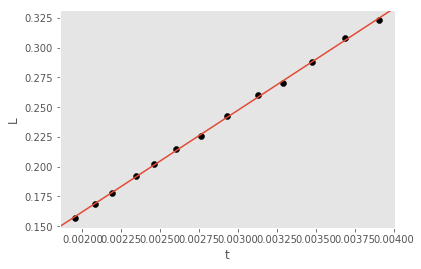

In [85]:
explanatory = Q("t")
response = Q("L")
model = LinearModel(explanatory, response)
model.fit(data);
model.plot()

We can easily tell that there is a strong, positive correlation between period and tube length. Now, let's create a residual plot. Residual plots are extremely easy in SALMON, simply call `.residual_plots()` on your linear model and a residual plot will be plotted.

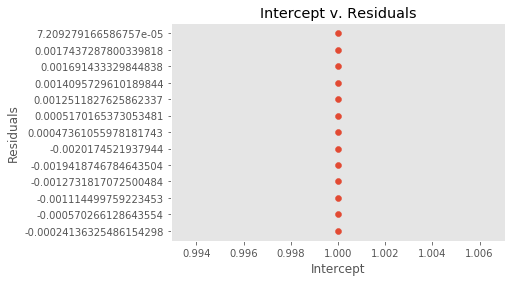

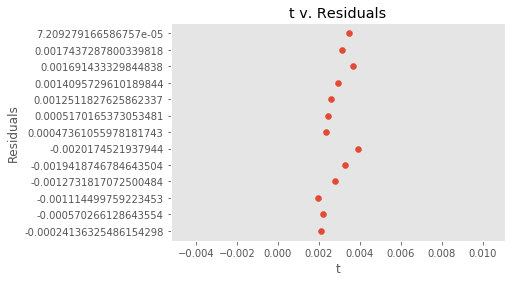

In [86]:
model.residual_plots()